Shape:
 (891, 12)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe:

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN          

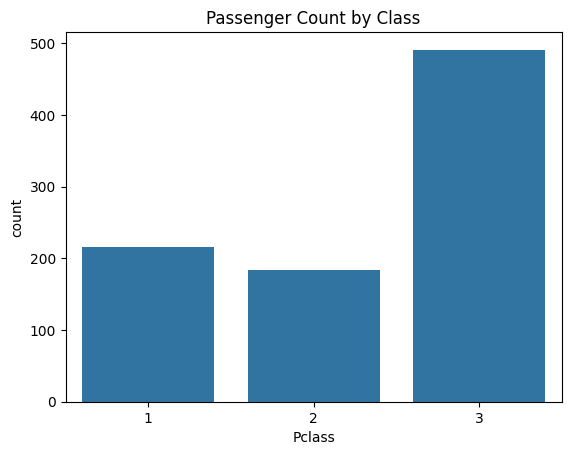


Female Survivors:
 1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
874                Abelson, Mrs. Samuel (Hannah Wizosky)
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
Name: Name, Length: 233, dtype: object

3rd Class, Under 18:
                                         Name   Age  Pclass
7             Palsson, Master. Gosta Leonard   2.0       3
10           Sandstrom, Miss. Marguerite Rut   4.0       3
14      Vestrom, Miss. Hulda Amanda Adolfina  14.0       3
16                      Rice, Master. Eugene   2.0     

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/Titanic-Dataset.csv')


print("Shape:\n", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nDescribe:\n")
print(df.describe(include='all'))


imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

df['Cabin'] = df['Cabin'].fillna("Unknown")

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

sns.countplot(data=df, x='Pclass')
plt.title("Passenger Count by Class")
plt.show()

female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale Survivors:\n", female_survivors['Name'])

third_class_young = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n3rd Class, Under 18:\n", third_class_young[['Name', 'Age', 'Pclass']])

class1_over40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nClass 1, Age > 40:\n", class1_over40[['Name', 'Age', 'Pclass']])


class1_over40_survived = class1_over40[class1_over40['Survived'] == 1]
print("\nClass 1, Age > 40, Survived:\n", class1_over40_survived[['Name', 'Age']])

high_fare_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers with Fare > 100:\n", high_fare_males[['Name', 'Fare']])

embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nEmbarked from 'C' and Class 2:\n", embarked_c_class2[['Name', 'Embarked', 'Pclass']])

sibsp_gt2 = df[df['SibSp'] > 2]
print("\nSibSp > 2:\n", sibsp_gt2[['Name', 'SibSp']])

no_family_died = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nDid not survive, no family aboard:\n", no_family_died[['Name']])

oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest survivors:\n", oldest_survivors[['Name', 'Age']])

free_fare = df[df['Fare'] == 0]
print("\nPassengers with zero fare:\n", free_fare[['Name', 'Fare']])
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("\nTrain shape:", train_df.shape)
print("Test shape:", test_df.shape)